In [1]:
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [2]:

def get_dataset(name_dataset):
    if name_dataset == "Iris":
        data = datasets.load_iris()
    elif name_dataset == "Breast Cancer":
        data = datasets.load_breast_cancer()
    else:
        data = datasets.load_wine()
    a = data.data
    b = data.target
    return a,b


In [3]:
st.title("My First Streamlit Basic DS Project.")
with st.form(key='my_dic'):
    st.write("""
    #SVM CLASSIFIER EXPLORER
    """)
    dataset_name = st.sidebar.selectbox("Select Dataset of your Wish",("Iris","Breast Cancer","Wine Dataset"))
    a,b = get_dataset(dataset_name)
    ps = dict()
    C = st.slider('C',0.01,10.0)
    ps['C'] = C
    clf = SVC(C = ps['C'])

2023-01-22 19:26:04.491 
  command:

    streamlit run C:\Users\91771\AppData\Roaming\Python\Python38\site-packages\ipykernel_launcher.py [ARGUMENTS]
2023-01-22 19:26:04.491 Session state does not function when running a script without `streamlit run`


In [4]:
 if(st.form_submit_button(label='Explore')):
     st.write("Shape of Dataset",a.shape)
     st.write("Number of classes",len(np.unique(b)))
     a_train , a_test , b_train , b_test= train_test_split(a,b,test_size=0.2,random_state=1234)
     clf.fit(a_train,b_train)
     b_pred = clf.predict(a_test)
     acc = accuracy_score(b_test,b_pred)
     st.write(f'Accuracy =', acc)


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=FormData(form_id='my_dic'))

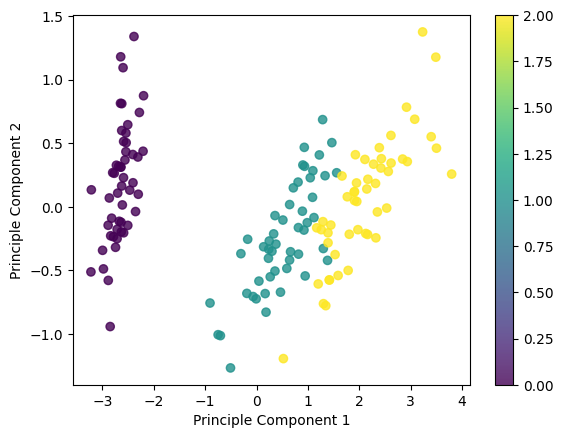

In [6]:
     pca = PCA(2)
     a_projected = pca.fit_transform(a)
     a1 = a_projected[:, 0]
     a2 = a_projected[:, 1]
     fig = plt.figure()
     plt.scatter(a1,a2,c=b,alpha=0.8,cmap='viridis')
     plt.xlabel('Principle Component 1')
     plt.ylabel('Principle Component 2')
     plt.colorbar()
     st.pyplot(fig)
